Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import sklearn
from sklearn import preprocessing
from sklearn import StandardScaler
#from sklearn.preprocessing 

#X_PATH = '/Users/mradamslavik/Desktop/Senior_Design/'
X_PATH = 'C:\\Users\\Adam\\Desktop\\caam495'

#PRESSURE_PATH = X_PATH + '/pressure/' # pressure data
#SATURATION_PATH = X_PATH + '/saturation/' # saturation data
#ROCK_PATH = X_PATH + '/rock/' # rock data

PRESSURE_PATH = X_PATH + '\\pressure\\'
SATURATION_PATH = X_PATH + '\\saturation\\'
ROCK_PATH = X_PATH + '\\rock\\'


#Goal: Use Porosity/Permeability --Predict-> Final Saturation/Pressure

Import + Normalization

In [2]:
def take_data (indices,start):

    PorData = []
    PerData = []

    PData = []
    
    SData = []
    #for filename in os.listdir(X_PATH+'rock/'):
    for i in indices:
        #temp_data = np.loadtxt(X_PATH+'rock/'+'rock'+str(i)+'.txt',delimiter = ',')
        temp_data = np.loadtxt(ROCK_PATH+'rock'+str(i)+'.txt',delimiter = ',')
        #temp_data = np.reshape(temp_data,(10,13200),order ='F')
        temp_data = np.reshape(temp_data,(10,60,220),order ='F')
        
        #Por_temp = temp_data[0,:]
        Por_temp = temp_data[0,:,:]
        PorData.append(Por_temp)
        
        #Per_temp = temp_data[(1,2,3),:]
        Per_temp = temp_data[(1,2,3),:,:]
        #return Per_temp.shape
        #(3, 13200)
        PerData.append(Per_temp)
    ##
    ##
    ###for filename in os.listdir(X_PATH+'pressure/'):
    ##for i in indices:
        #temp_data = np.loadtxt(X_PATH+'pressure/'+'pressure'+str(i)+'.txt',delimiter = ',')
        temp_data = np.loadtxt(PRESSURE_PATH+'pressure'+str(i)+'.txt',delimiter = ',')
        #temp_data = np.reshape(temp_data,(75,13200),order ='F')
        temp_data = np.reshape(temp_data,(75,60,220),order ='F')
        #Only Take Final State                
        #temp_data = temp_data[74,:]
        temp_data = temp_data[74,:,:]
        PData.append(temp_data)
    ##
    ##
    ###for filename in os.listdir(X_PATH+'saturation/'):
    ##for i in indices:
        #temp_data = np.loadtxt(X_PATH+'saturation/'+'saturaton'+str(i)+'.txt',delimiter = ',')
        temp_data = np.loadtxt(SATURATION_PATH+'saturaton'+str(i)+'.txt',delimiter = ',')
        #temp_data = np.reshape(temp_data,(75,13200),order ='F')
        temp_data = np.reshape(temp_data,(75,60,220),order ='F')
        #Only Take Final State                
        #temp_data = temp_data[74,:]
        temp_data = temp_data[74,:,:]
        SData.append(temp_data)

        
    
    PorData = np.array(PorData)
    #return PorData.shape
    #indices, 3perm, total nodes
    #PorData = sklearn.preprocessing.normalize(PorData, norm='l2', axis=1, copy=True, return_norm=False)
    PerData = np.array(PerData) 
    #return PerData.shape
    #indices, per-per-per, total nodes
    
    #PerData[:,0,:] = sklearn.preprocessing.normalize(PerData[:,0,:], norm='l2', axis=1, copy=True, return_norm=False)
    #PerData[:,1,:] = sklearn.preprocessing.normalize(PerData[:,1,:], norm='l2', axis=1, copy=True, return_norm=False)
    #PerData[:,2,:] = sklearn.preprocessing.normalize(PerData[:,2,:], norm='l2', axis=1, copy=True, return_norm=False)
    
    
    PData = np.array(PData) 
    #PData = sklearn.preprocessing.normalize(PData, norm='l2', axis=1, copy=True, return_norm=False)
    
    SData = np.array(SData) 
    #SData = sklearn.preprocessing.normalize(SData, norm='l2', axis=1, copy=True, return_norm=False)
    
    #print (indices)
    for i in indices-1-start:
        PorData[i,:,:] = sklearn.preprocessing.normalize(PorData[i,:,:], norm='l2', axis=1, copy=True, return_norm=False)
        #print (PorData[i,:,:].shape)
        PerData[i,0,:,:] = sklearn.preprocessing.normalize(PerData[i,0,:,:], norm='l2', axis=1, copy=True, return_norm=False)
        PerData[i,1,:,:] = sklearn.preprocessing.normalize(PerData[i,1,:,:], norm='l2', axis=1, copy=True, return_norm=False)
        PerData[i,2,:,:] = sklearn.preprocessing.normalize(PerData[i,2,:,:], norm='l2', axis=1, copy=True, return_norm=False)
        PData[i,:,:] = sklearn.preprocessing.normalize(PData[i,:,:], norm='l2', axis=1, copy=True, return_norm=False)
        SData[i,:,:] = sklearn.preprocessing.normalize(SData[i,:,:], norm='l2', axis=1, copy=True, return_norm=False)
        
    
    print (PorData.shape)       
    print (PerData[:,0,:,:].shape)  
    #norm_dataset = np.dstack([PorData, PerData[:,0,:], PerData[:,1,:], PerData[:,2,:], PData, SData])    
    #norm_inputs = np.dstack([PorData, PerData[:,0,:], PerData[:,1,:], PerData[:,2,:]])
    #norm_outputs = np.dstack([PData, SData])
    
    #norm_dataset = np.dstack([PorData, PerData[:,0,:,:], PerData[:,1,:,:], PerData[:,2,:,:], PData, SData])    
    #norm_inputs = np.dstack([PorData, PerData[:,0,:,:], PerData[:,1,:,:], PerData[:,2,:,:]])
    
    
    PorData = np.reshape(PorData,(indices.size,60,220,1))
    PerData = np.reshape(PerData,(indices.size,3,60,220,1))
    PData = np.reshape(PData,(indices.size,60,220,1))
    SData = np.reshape(SData,(indices.size,60,220,1))
    
    norm_inputs = PorData
    norm_inputs = np.append( norm_inputs , PerData[:,0,:,:] , axis = 3)
    norm_inputs = np.append( norm_inputs , PerData[:,1,:,:] , axis = 3)
    norm_inputs = np.append( norm_inputs , PerData[:,2,:,:] , axis = 3)

    norm_outputs = PData
    norm_outputs = np.append( norm_outputs , SData , axis = 3)
    
    norm_dataset = norm_inputs
    norm_dataset = np.append( norm_dataset , norm_outputs , axis = 3)
    
    
    #return norm_inputs.shape
    #indices, total nodes, por-per-per-per
                               
    return [norm_dataset, norm_inputs, norm_outputs]

In [516]:
norm_inputs.shape

(699, 60, 220, 4)

In [520]:
norm_inputs[1,:,:,0].shape

(60, 220)

Run Me

In [3]:
total_number_runs = 1000
num_training = 700


num_testing = total_number_runs - num_training


num_indices = num_training
num_indices2 = num_training + num_testing


#[normed_dataset, norm_inputs, norm_outputs] = take_data(np.arange(1,num_indices+1),0)
[normed_dataset, norm_inputs, norm_outputs] = take_data(np.arange(1,num_indices),0)
#normed_dataset 
#[normed_dataset2, norm_inputs2, norm_outputs2] = take_data(np.arange(num_indices+1,num_testing+1),8)
[normed_dataset2, norm_inputs2, norm_outputs2] = take_data(np.arange(num_indices+1,num_indices2),num_training+1)

(699, 60, 220)
(699, 60, 220)
(299, 60, 220)
(299, 60, 220)


In [437]:
norm_inputs.shape
norm_outputs.shape
#indices = np.arange(1,11)
#indices.size
#normed_dataset
#normed_dataset2

(699, 60, 220, 2)

Prepare to Feed Data

In [ ]:
norm_input_less_y = norm_inputs[:,:,:,[0,1,3]]

norm_output_less_sat = norm_outputs[:,:,:,0]
norm_output_less_sat = np.reshape(norm_output_less_sat,(699,60,220,1))

norm_output_less_sat.shape

In [ ]:
#take_data(np.arange(1,num_indices+1),1)

In [7]:
import numpy as np
import pandas as pd
import keras
import keras
from keras.layers import Reshape, Flatten, Input, Dense, concatenate, Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, GlobalMaxPool2D
from keras.models import Model
from matplotlib import pyplot as plt
from scipy.ndimage import rotate as ro

In [541]:
#First Model

#Input_figure = Input(shape=(60,220,4), name='input1')
Input_figure = Input(shape=(60,220,4), name='input1')
#Input_angle = Input(shape=(12,1), name = 'input2')
#Input_angle = Input(shape=(60,220,2), name = 'input2')
#Output_figure = Input(shape=(60,220,2), name='output1')

#x = Conv2D(4, kernel_size=(3,3),padding="VALID")(Input_figure)
x = Conv2D(4, kernel_size=(3,3),padding="SAME")(Input_figure)
x = BatchNormalization()(x)
x = Activation('elu')(x)
x = MaxPooling2D(pool_size=(1,1))(x)

x = Conv2D(10, kernel_size=(5,5),padding="SAME")(x)
x = BatchNormalization()(x)
x = Activation('elu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Conv2D(4, kernel_size=(4,4),padding="SAME")(x)
x = BatchNormalization()(x)
x = Activation('elu')(x)
x = MaxPooling2D(pool_size=(1,1))(x)


x = Conv2D(3, kernel_size=(3,3),padding="SAME")(x)
x = BatchNormalization()(x)
x = Activation('elu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Conv2D(2, kernel_size=(2,2),padding="SAME")(x)
x = BatchNormalization()(x)
x = Activation('elu')(x)
x = MaxPooling2D(pool_size=(1,1))(x)


shape = x.get_shape().as_list()
print(shape)
#x = Reshape((shape[1] * shape[2] * shape[3],1,1))(x)




x = Conv2D(16, kernel_size=(2,2),padding="SAME")(x)

shape = x.get_shape().as_list()
print(shape)


x = Reshape((60,220,2))(x)
#x = Reshape((30,110,1))(x)




#x.reshape(x, [shape[0], shape[1] * shape[2] * shape[3]])
shape = x.get_shape().as_list()
print(shape)



#out = Conv2D(2, kernel_size=(2,2),padding="VALID", dim_ordering="th")(x)
out = Conv2D(2,kernel_size=(1,1),padding="VALID")(x)
#out = Input(shape=(60,220,2), name='output1')

#out = Conv2D(2, kernel_size=(3,3))(out)
#out = Conv2D(2)(out)

[None, 15, 55, 2]
[None, 15, 55, 16]


ValueError: total size of new array must be unchanged

In [542]:
#Second Model
Input_figure = Input(shape=(60,220,4), name='input1')

x = Conv2D(8, kernel_size=(8,8),padding="SAME")(Input_figure)
x = BatchNormalization()(x)
x = Activation('elu')(x)
x = MaxPooling2D(pool_size=(4,4))(x)

x = Conv2D(4, kernel_size=(2,2),padding="SAME")(x)
x = BatchNormalization()(x)
x = Activation('elu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)

shape = x.get_shape().as_list()
print(shape)

x = Reshape((60,220,2))(x)

out = Conv2D(2,kernel_size=(1,1),padding="VALID")(x)

[None, 7, 27, 4]


ValueError: total size of new array must be unchanged

In [557]:
#Model 2.5

Input_figure = Input(shape=(60,220,4), name='input1')

x = Conv2D(32, kernel_size=(16,16),padding="SAME")(Input_figure)
x = BatchNormalization()(x)
x = Activation('elu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Conv2D(16, kernel_size=(8,8),padding="SAME")(x)
x = BatchNormalization()(x)
x = Activation('elu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)

shape = x.get_shape().as_list()
print(shape)

x = Conv2D(8, kernel_size=(4,4),padding="SAME")(x)
x = BatchNormalization()(x)
x = Activation('elu')(x)
x = MaxPooling2D(pool_size=(1,1))(x)

x = Conv2D(4, kernel_size=(2,2),padding="SAME")(x)
x = BatchNormalization()(x)
x = Activation('elu')(x)
x = MaxPooling2D(pool_size=(1,1))(x)


x = Conv2D(32, kernel_size=(1,1),padding="SAME")(x)
x = BatchNormalization()(x)
x = Activation('elu')(x)
x = MaxPooling2D(pool_size=(1,1))(x)

shape = x.get_shape().as_list()
print(shape)

x = Reshape((60,220,2))(x)

out = Conv2D(2,kernel_size=(1,1),padding="VALID")(x)

[None, 15, 55, 16]
[None, 15, 55, 32]


In [566]:
#Model 2.55

Input_figure = Input(shape=(60,220,4), name='input1')

x = Conv2D(128, kernel_size=(8,8),padding="SAME")(Input_figure)
x = BatchNormalization()(x)
x = Activation('elu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Conv2D(64, kernel_size=(8,8),padding="SAME")(x)
x = BatchNormalization()(x)
x = Activation('elu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)

shape = x.get_shape().as_list()
print(shape)

x = Conv2D(32, kernel_size=(4,4),padding="SAME")(x)
x = BatchNormalization()(x)
x = Activation('elu')(x)
x = MaxPooling2D(pool_size=(1,1))(x)

x = Conv2D(32, kernel_size=(2,2),padding="SAME")(x)
x = BatchNormalization()(x)
x = Activation('elu')(x)
x = MaxPooling2D(pool_size=(1,1))(x)


x = Conv2D(32, kernel_size=(1,1),padding="SAME")(x)
x = BatchNormalization()(x)
x = Activation('elu')(x)
x = MaxPooling2D(pool_size=(1,1))(x)

shape = x.get_shape().as_list()
print(shape)

x = Reshape((60,220,2))(x)

out = Conv2D(2,kernel_size=(1,1),padding="VALID")(x)

[None, 15, 55, 64]
[None, 15, 55, 32]


In [62]:
norm_input_less_y = norm_inputs[:,:,:,[0,1,3]]

norm_output_less_sat = norm_outputs[:,:,:,0]
norm_output_less_sat = np.reshape(norm_output_less_sat,(699,60,220,1))

norm_output_less_sat.shape


norm_output_less_pre = norm_outputs[:,:,:,1]
norm_output_less_pre = np.reshape(norm_output_less_pre,(699,60,220,1))

In [ ]:
#Model 2.6

Input_figure = Input(shape=(60,220,4), name='input1')


x = Conv2D(1, kernel_size=(1,1),padding="SAME")(Input_figure)
x = BatchNormalization()(x)
x = Activation('elu')(x)
x = MaxPooling2D(pool_size=(1,1))(x)

shape = x.get_shape().as_list()
print(shape)

x = Reshape((60,220,2))(x)

out = Conv2D(2,kernel_size=(1,1),padding="VALID")(x)

In [63]:
#Model 2.66

Input_figure = Input(shape=(60,220,3), name='input1')

x = Conv2D(64, kernel_size=(5,5),padding="SAME")(Input_figure)
x = BatchNormalization()(x)
x = Activation('elu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)


x = Conv2D(32, kernel_size=(5,5),padding="SAME")(x)
x = BatchNormalization()(x)
x = Activation('elu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)

shape = x.get_shape().as_list()
print(shape)

#x = Conv2D(16, kernel_size=(4,4),padding="SAME")(x)
#x = BatchNormalization()(x)
#x = Activation('elu')(x)
#x = MaxPooling2D(pool_size=(1,1))(x)


x = Conv2D(16, kernel_size=(5,5),padding="SAME")(x)
x = BatchNormalization()(x)
x = Activation('elu')(x)
x = MaxPooling2D(pool_size=(1,1))(x)

shape = x.get_shape().as_list()
print(shape)



shape = x.get_shape().as_list()
print(shape)

x = Reshape((60,220,1))(x)

out = Conv2D(1,kernel_size=(1,1),padding="VALID")(x)

[None, 15, 55, 32]
[None, 15, 55, 16]
[None, 15, 55, 16]


In [ ]:
#Model 2.67

Input_figure = Input(shape=(60,220,3), name='input1')

x = Conv2D(64, kernel_size=(5,5),padding="SAME")(Input_figure)
x = BatchNormalization()(x)
x = Activation('elu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)


x = Conv2D(32, kernel_size=(5,5),padding="SAME")(x)
x = BatchNormalization()(x)
x = Activation('elu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)

shape = x.get_shape().as_list()
print(shape)

#x = Conv2D(16, kernel_size=(4,4),padding="SAME")(x)
#x = BatchNormalization()(x)
#x = Activation('elu')(x)
#x = MaxPooling2D(pool_size=(1,1))(x)


x = Conv2D(16, kernel_size=(5,5),padding="SAME")(x)
x = BatchNormalization()(x)
x = Activation('elu')(x)
x = MaxPooling2D(pool_size=(1,1))(x)

shape = x.get_shape().as_list()
print(shape)



shape = x.get_shape().as_list()
print(shape)

x = Reshape((60,220,1))(x)

out = Conv2D(1,kernel_size=(1,1),padding="VALID")(x)

In [76]:
#model = Model(inputs=[Input_figure, Input_angle], outputs=out)
model = Model(inputs=[Input_figure], outputs=out)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input1 (InputLayer)          (None, 60, 220, 3)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 60, 220, 64)       4864      
_________________________________________________________________
batch_normalization_35 (Batc (None, 60, 220, 64)       256       
_________________________________________________________________
activation_35 (Activation)   (None, 60, 220, 64)       0         
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 30, 110, 64)       0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 30, 110, 32)       51232     
_________________________________________________________________
batch_normalization_36 (Batc (None, 30, 110, 32)       128       
__________

In [77]:
opt = keras.optimizers.nadam()
model.compile(optimizer=opt,
              loss='mean_squared_error', 
            )

#history = model.fit([norm_input_less_y],[norm_output_less_sat], batch_size = 10, epochs =9, verbose =1, validation_split = 0.1)
history = model.fit([norm_input_less_y],[norm_output_less_pre], batch_size = 10, epochs =9, verbose =1, validation_split = 0.1)

Train on 629 samples, validate on 70 samples
Epoch 1/9
629/629 [==============================] - 7s 11ms/step - loss: 3.2157e-04 - val_loss: 4.2800e-04
Epoch 2/9
629/629 [==============================] - 5s 8ms/step - loss: 3.1717e-04 - val_loss: 4.1266e-04
Epoch 3/9
629/629 [==============================] - 5s 8ms/step - loss: 3.1019e-04 - val_loss: 3.8556e-04
Epoch 4/9
629/629 [==============================] - 5s 8ms/step - loss: 3.0520e-04 - val_loss: 5.0372e-04
Epoch 5/9
629/629 [==============================] - 5s 8ms/step - loss: 3.0427e-04 - val_loss: 0.0011
Epoch 6/9
629/629 [==============================] - 5s 8ms/step - loss: 2.9980e-04 - val_loss: 4.0983e-04
Epoch 7/9
629/629 [==============================] - 5s 8ms/step - loss: 2.9699e-04 - val_loss: 4.7917e-04
Epoch 8/9
629/629 [==============================] - 5s 8ms/step - loss: 2.9744e-04 - val_loss: 6.8003e-04
Epoch 9/9
629/629 [==============================] - 5s 8ms/step - loss: 2.9015e-04 - val_loss: 5.0345

In [78]:
simulation_x = 18
model_inputs1 = norm_inputs2[simulation_x,:,:,0]
#model_inputs.reshape(1,60,220)
model_inputs1 = np.reshape(model_inputs1,(1,60,220,1))
model_inputs = model_inputs1
print(model_inputs.shape)
model_inputs2 = norm_inputs2[simulation_x,:,:,1]
model_inputs2 = np.reshape(model_inputs2,(1,60,220,1))
print(model_inputs2.shape)
model_inputs = np.append( model_inputs , model_inputs2 , axis = 3)
model_inputs3 = norm_inputs2[simulation_x,:,:,2]
model_inputs3 = np.reshape(model_inputs3,(1,60,220,1))
print(model_inputs3.shape)
model_inputs = np.append( model_inputs , model_inputs3 , axis = 3)
print(model_inputs.shape)


modpredict = model.predict([model_inputs])
modpredict.shape

(1, 60, 220, 1)
(1, 60, 220, 1)
(1, 60, 220, 1)
(1, 60, 220, 3)


(1, 60, 220, 1)

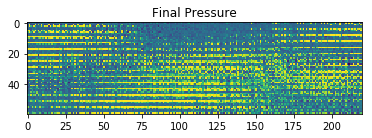

In [60]:
#newXprod = np.reshape(temppredict,(2, 220, 60, 1))
#statespred = np.reshape(np.swapaxes(modpredict,1,2),(1, 60, 220, 1))
#statespred = np.reshape(modpredict.T,(1, 60, 220, 1))
#statespred.shape
#statespred = np.append( statespred , np.swapaxes(modpredict.T,1,2) , axis = 3)
#print(statespred.shape)
#newXprod = np.reshape(newXprod[1,:,:,:],(13200,2))
#tempXProd = np.expand_dims(newXprod, axis = 0)
#modpredict = statespred[0,:,:,:]
modpredict.shape
statespred = modpredict

pressure_pred = plt.imshow(statespred[0,:,:,0],label='Well 1')
plt.title('Final Pressure')
plt.show()

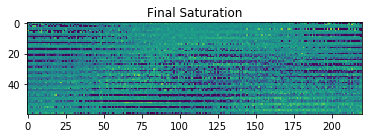

In [67]:
#Model 2.66 Test Instance #333
modpredict.shape
statespred = modpredict

pressure_pred = plt.imshow(statespred[0,:,:,0],label='Well 1')
plt.title('Final Saturation')
plt.show()

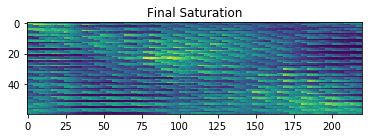

In [71]:
#Model 2.66 Test Instance #333
modpredict.shape
statespred = modpredict

pressure_pred = plt.imshow(statespred[0,:,:,0],label='Well 1')
plt.title('Final Saturation')
plt.show()

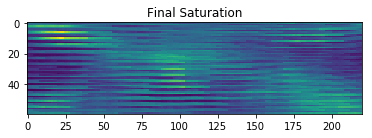

In [75]:
#Model 2.66 Test Instance #333
modpredict.shape
statespred = modpredict

pressure_pred = plt.imshow(statespred[0,:,:,0],label='Well 1')
plt.title('Final Saturation')
plt.show()

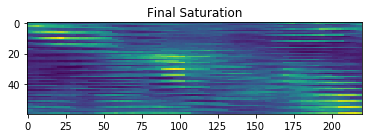

In [79]:
#Model 2.66 Test Instance #333
modpredict.shape
statespred = modpredict

pressure_pred = plt.imshow(statespred[0,:,:,0],label='Well 1')
plt.title('Final Saturation')
plt.show()

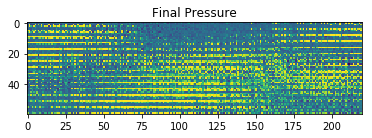

In [54]:
#Model 2.66
modpredict.shape
statespred = modpredict

pressure_pred = plt.imshow(statespred[0,:,:,0],label='Well 1')
plt.title('Final Pressure')
plt.show()

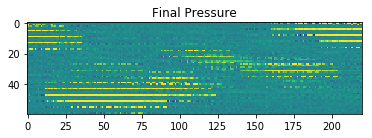

In [22]:

modpredict.shape
statespred = modpredict

pressure_pred = plt.imshow(statespred[0,:,:,0],label='Well 1')
plt.title('Final Pressure')
plt.show()

In [522]:
#Model 2.7

Input_poro = Input(shape=(60,220,1), name='input1')
Input_permx = Input(shape=(60,220,1), name='input2')
Input_permy = Input(shape=(60,220,1), name='input3')
Input_permz = Input(shape=(60,220,1), name='input4')


x = Conv2D(8, kernel_size=(1,1))(Input_poro)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(1,1))(x)


x = Conv2D(16, kernel_size=(2,2),padding="SAME")(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)


x = Conv2D(4, kernel_size=(2,2),padding="SAME")(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(1,1))(x)


x = Conv2D(2, kernel_size=(4,4),padding="SAME")(Input_permx)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(1,1))(x)

x = Conv2D(2, kernel_size=(4,4),padding="SAME")(Input_permy)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(1,1))(x)

x = Conv2D(2, kernel_size=(4,4),padding="SAME")(Input_permz)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(1,1))(x)



x = Conv2D(4, kernel_size=(1,1),padding="SAME")(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Conv2D(4, kernel_size=(1,1),padding="SAME")(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Conv2D(16, kernel_size=(1,1),padding="SAME")(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(1,1))(x)



shape = x.get_shape().as_list()
print(shape)

x = Reshape((60,220,2))(x)

out = Conv2D(2,kernel_size=(1,1),padding="VALID")(x)

[None, 15, 55, 16]


In [373]:
#Third Model

#Input_figure = Input(shape=(60,220,4), name='input1')
Input_figure = Input(shape=(60,220,4), name='input1')
#Input_angle = Input(shape=(12,1), name = 'input2')
#Input_angle = Input(shape=(60,220,2), name = 'input2')
#Output_figure = Input(shape=(60,220,2), name='output1')

#x = Conv2D(4, kernel_size=(3,3),padding="VALID")(Input_figure)
x = Conv2D(16, kernel_size=(3,3))(Input_figure)
x = BatchNormalization()(x)
x = Activation('elu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)

x = Conv2D(10, kernel_size=(5,5))(x)
x = BatchNormalization()(x)
x = Activation('elu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)



shape = x.get_shape().as_list()
print(shape)
#x = Reshape((shape[1] * shape[2] * shape[3],1,1))(x)


x = Reshape((20,78,4))(x)
#x = Flatten()(x)
x = Conv2D(16, kernel_size=(2,2))(x)

shape = x.get_shape().as_list()
print(shape)


#x = Reshape((60,220,1))(x)
#x = Reshape((30,110,1))(x)




#x.reshape(x, [shape[0], shape[1] * shape[2] * shape[3]])
shape = x.get_shape().as_list()
print(shape)



#out = Conv2D(2, kernel_size=(2,2),padding="VALID", dim_ordering="th")(x)
out = Conv2D(2,kernel_size=(1,1),padding="VALID")(x)
#out = Input(shape=(60,220,2), name='output1')

#out = Conv2D(2, kernel_size=(3,3))(out)
#out = Conv2D(2)(out)

[None, 12, 52, 10]
[None, 19, 77, 16]
[None, 19, 77, 16]


In [545]:
#model = Model(inputs=[Input_figure, Input_angle], outputs=out)
model = Model(inputs=[Input_poro, Input_permx, Input_permy, Input_permz], outputs=out)

ValueError: Graph disconnected: cannot obtain value for tensor Tensor("input1_95:0", shape=(?, 60, 220, 4), dtype=float32) at layer "input1". The following previous layers were accessed without issue: []

In [524]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input4 (InputLayer)          (None, 60, 220, 1)        0         
_________________________________________________________________
conv2d_593 (Conv2D)          (None, 60, 220, 2)        34        
_________________________________________________________________
batch_normalization_480 (Bat (None, 60, 220, 2)        8         
_________________________________________________________________
activation_480 (Activation)  (None, 60, 220, 2)        0         
_________________________________________________________________
max_pooling2d_480 (MaxPoolin (None, 60, 220, 2)        0         
_________________________________________________________________
conv2d_594 (Conv2D)          (None, 60, 220, 4)        12        
_________________________________________________________________
batch_normalization_481 (Bat (None, 60, 220, 4)        16        
__________

In [567]:
#model = Model(inputs=[Input_figure, Input_angle], outputs=out)
model = Model(inputs=[Input_figure], outputs=out)

In [568]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input1 (InputLayer)          (None, 60, 220, 4)        0         
_________________________________________________________________
conv2d_623 (Conv2D)          (None, 60, 220, 128)      32896     
_________________________________________________________________
batch_normalization_506 (Bat (None, 60, 220, 128)      512       
_________________________________________________________________
activation_506 (Activation)  (None, 60, 220, 128)      0         
_________________________________________________________________
max_pooling2d_506 (MaxPoolin (None, 30, 110, 128)      0         
_________________________________________________________________
conv2d_624 (Conv2D)          (None, 30, 110, 64)       524352    
_________________________________________________________________
batch_normalization_507 (Bat (None, 30, 110, 64)       256       
__________

In [569]:
opt = keras.optimizers.nadam()
model.compile(optimizer=opt,
              loss='mean_squared_error', 
            )

In [570]:
#history = model.fit([XRock,XProd],Y, batch_size = 50, epochs =9, verbose =1, validation_split = 0.1)
history = model.fit([norm_inputs],[norm_outputs], batch_size = 10, epochs =9, verbose =1, validation_split = 0.1)

Train on 629 samples, validate on 70 samples
Epoch 1/9
629/629 [==============================] - 231s 366ms/step - loss: 0.0981 - val_loss: 0.0463
Epoch 2/9
629/629 [==============================] - 199s 316ms/step - loss: 0.0120 - val_loss: 0.0076
Epoch 3/9
629/629 [==============================] - 205s 326ms/step - loss: 0.0057 - val_loss: 0.0103
Epoch 4/9
629/629 [==============================] - 201s 319ms/step - loss: 0.0034 - val_loss: 0.0020
Epoch 5/9
629/629 [==============================] - 207s 329ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 6/9
629/629 [==============================] - 184s 292ms/step - loss: 0.0019 - val_loss: 0.0065
Epoch 7/9
629/629 [==============================] - 191s 304ms/step - loss: 0.0013 - val_loss: 8.4562e-04
Epoch 8/9
629/629 [==============================] - 182s 290ms/step - loss: 9.7229e-04 - val_loss: 0.0014
Epoch 9/9
629/629 [==============================] - 190s 301ms/step - loss: 8.1421e-04 - val_loss: 5.9496e-04


In [468]:
#history = model.fit([XRock,XProd],Y, batch_size = 50, epochs =9, verbose =1, validation_split = 0.1)


norm_inputstar1 = np.reshape(norm_inputs[:,:,:,0],(699,60,220,1))
norm_inputstar2 = np.reshape(norm_inputs[:,:,:,1],(699,60,220,1))
norm_inputstar3 = np.reshape(norm_inputs[:,:,:,2],(699,60,220,1))
norm_inputstar4 = np.reshape(norm_inputs[:,:,:,3],(699,60,220,1))

history = model.fit([norm_inputstar1,norm_inputstar2,norm_inputstar3,norm_inputstar4],norm_outputs, batch_size = 10, epochs =4, verbose =1, validation_split = 0.1)

Train on 629 samples, validate on 70 samples
Epoch 1/4
629/629 [==============================] - 10s 15ms/step - loss: 0.0163 - val_loss: 0.0087
Epoch 2/4
629/629 [==============================] - 1s 2ms/step - loss: 0.0076 - val_loss: 0.0055
Epoch 3/4
629/629 [==============================] - 1s 2ms/step - loss: 0.0047 - val_loss: 0.0034
Epoch 4/4
629/629 [==============================] - 1s 2ms/step - loss: 0.0030 - val_loss: 0.0022


In [506]:
model.save('alphamodel.h5')

In [507]:
model.load_weights('alphamodel.h5')

Error Propogation on Stacked Prediction

In [ ]:
test_index = 6

In [444]:
simulation_x = 12

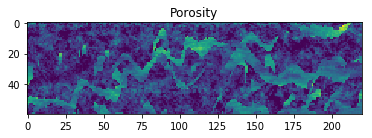

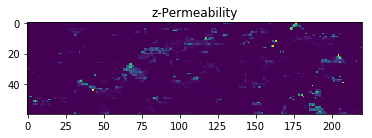

In [445]:
pressure_fin = plt.imshow(norm_inputs2[simulation_x,:,:,0],label='Well 1')
plt.title('Porosity')
plt.show()
saturation_fin = plt.imshow(norm_inputs2[simulation_x,:,:,3],label='Well 1')
plt.title('z-Permeability')
plt.show()

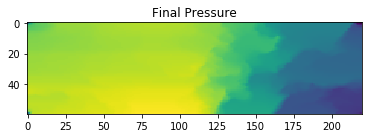

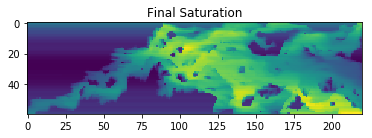

In [446]:
#well_1 = plt.plot(YTest[0:72,0],label='Well 1')
#well_1 = plt.plot(YTest[0:72,1],label='Well 1')
#well_1 = plt.plot(YTest[0:72,2],label='Well 1')
#well_1 = plt.plot(YTest[0:72,3],label='Well 1')

pressure_fin = plt.imshow(norm_outputs2[simulation_x,:,:,0],label='Well 1')
plt.title('Final Pressure')
plt.show()
saturation_fin = plt.imshow(norm_outputs2[simulation_x,:,:,1],label='Well 1')
plt.title('Final Saturation')
plt.show()
#well_1 = plt.plot(norm_outputs2[0:72,2],label='Well 1')
#well_1 = plt.plot(norm_outputs2[0:72,3],label='Well 1')


In [530]:
model_inputs1 = norm_inputs2[simulation_x,:,:,0]
#model_inputs.reshape(1,60,220)
model_inputs1 = np.reshape(model_inputs1,(1,60,220,1))
model_inputs = model_inputs1
print(model_inputs.shape)
model_inputs2 = norm_inputs2[simulation_x,:,:,1]
model_inputs2 = np.reshape(model_inputs2,(1,60,220,1))
print(model_inputs2.shape)
model_inputs = np.append( model_inputs , model_inputs2 , axis = 3)
model_inputs3 = norm_inputs2[simulation_x,:,:,2]
model_inputs3 = np.reshape(model_inputs3,(1,60,220,1))
print(model_inputs3.shape)
model_inputs = np.append( model_inputs , model_inputs3 , axis = 3)
model_inputs4 = norm_inputs[simulation_x,:,:,3]
model_inputs4 = np.reshape(model_inputs4,(1,60,220,1))
print(model_inputs4.shape)
model_inputs = np.append( model_inputs , model_inputs4 , axis = 3)
#model_inputs = np.append( model_inputs , np.reshape(norm_inputs2[1,:,:,1],(1,60,220)) , axis = 3)
#model_inputs = np.append( model_inputs , np.reshape(norm_inputs2[1,:,:,2],(1,60,220)) , axis = 3)
#model_inputs = np.append( model_inputs , np.reshape(norm_inputs2[1,:,:,3],(1,60,220)) , axis = 3)
print(model_inputs.shape)

(1, 60, 220, 1)
(1, 60, 220, 1)
(1, 60, 220, 1)
(1, 60, 220, 1)
(1, 60, 220, 4)


In [589]:
modpredict = model.predict([model_inputs])
modpredict.T.shape

ValueError: Error when checking input: expected input1 to have shape (60, 220, 3) but got array with shape (60, 220, 4)

In [539]:
modpredict = model.predict([model_inputs1,model_inputs2,model_inputs3,model_inputs4])
modpredict.T.shape

(2, 220, 60, 1)

TypeError: Invalid dimensions for image data

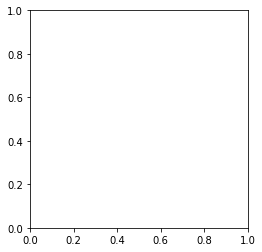

In [553]:
plt.imshow(modpredict.T[0,:,:],label='Well 1')
plt.imshow(modpredict.T[1,:,:],label='Well 1')

In [572]:
#newXprod = np.reshape(temppredict,(2, 220, 60, 1))
statespred = np.reshape(np.swapaxes(modpredict,1,2),(2, 60, 220, 1))
#statespred = np.reshape(modpredict.T,(2, 60, 220, 1))
statespred.shape
#statespred = np.append( statespred , np.swapaxes(modpredict.T,1,2) , axis = 3)
print(statespred.shape)
#newXprod = np.reshape(newXprod[1,:,:,:],(13200,2))
#tempXProd = np.expand_dims(newXprod, axis = 0)
modpredict = statespred[1,:,:,:]
modpredict.shape

(2, 60, 220, 1)


(60, 220, 1)

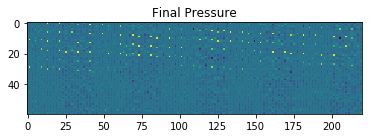

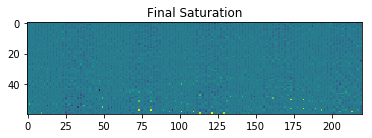

In [573]:
pressure_pred = plt.imshow(statespred[1,:,:,0],label='Well 1')
plt.title('Final Pressure')
plt.show()
saturation_pred = plt.imshow(statespred[0,:,:,0],label='Well 1')
plt.title('Final Saturation')
plt.show()

In [415]:
Pressure_Error = np.abs(norm_outputs2[simulation_x,:,:,0] - statespred[:,:,:,0])
Saturation_Error = np.abs(norm_outputs2[simulation_x,:,:,1] - statespred[:,:,:,1])

In [ ]:
PredictVals = []

tempXrock = np.expand_dims(XRockTest[0], axis = 0)
tempXProd = np.expand_dims(XProdtest[1], axis = 0)

# print(tempXProd)
# print(Ytest[0])
# print(np.reshape(np.reshape(tempXProd,(4,3)),(12,1)),'\n')

Ypred = []

for i in range(72):
    temppredict = model.predict([tempXrock,tempXProd])
    newXprod = np.reshape(tempXProd,(4,3))
    newXprod = np.append(newXprod,temppredict.T,axis = 1)
    newXprod = np.reshape(newXprod[:,1:],(12,1))
    tempXProd = np.expand_dims(newXprod, axis = 0)
    Ypred.append(temppredict)
Ypred = np.array(Ypred)    

In [ ]:
well_1 = plt.plot(Ypred[0:72,0,0],label='Well 1')
well_1 = plt.plot(Ypred[0:72,0,1],label='Well 1')
well_1 = plt.plot(Ypred[0:72,0,2],label='Well 1')
well_1 = plt.plot(Ypred[0:72,0,3],label='Well 1')
plt.title('Prediction Production')
plt.xlabel('Simulation time')